### Import

In [13]:
from astrosceni.image import Image
from astrosceni.stars_filter import StarsFilter
from astrosceni.mufinder import MuFinder
from matplotlib import pyplot as plt
import numpy as np

from astropy.convolution import Gaussian2DKernel
from astropy.convolution import convolve

# Image Class

### Importing images and cropping them

In [14]:
nb = Image('data/bs_h_ave_wcs.fits')
bb = Image('data/bs_r_ave_wcs.fits')

# nb.cropPixels(50, -50, 50, -50)
# bb.cropPixels(50, -50, 50, -50)

# sigma = 1
# kernel = Gaussian2DKernel(sigma)
# img = nb.getImageData()
# plt.imshow(img[528:548, 1900:1920])
# plt.show()

# img = convolve(bb.getImageData(), kernel)
# plt.imshow(img[528:548, 1900:1920])

# bb.setImageData(img)

1900 1920 528 548


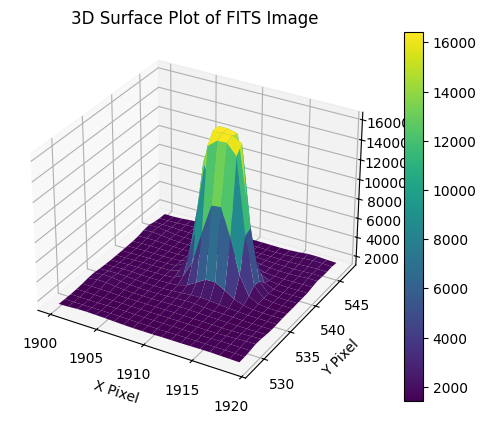

In [15]:
nb.cropPixels(50, -50, 50, -50)
nb.plot3D(x_start = 1900, x_end = 1920, y_start = 528, y_end = 548, elevation = 30, rotation = 300)

1900 1920 528 548


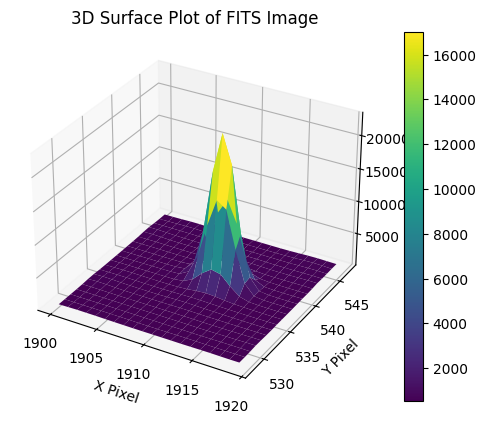

In [16]:
bb.cropPixels(50, -50, 50, -50)
bb.plot3D(x_start = 1900, x_end = 1920, y_start = 528, y_end = 548, elevation = 30, rotation = 300)

In [ ]:
# plt.imshow(bb.getImageData()[528:548, 1900:1920])

### Check and remove saturated pixels

In [ ]:
print(nb.checkSaturatedPixelCount(saturated_ratio_lim=0.001))
nb.setSaturatedPixelsToNan()
print(nb.checkSaturatedPixelCount(saturated_ratio_lim=0.001))

### Test loading another image

In [ ]:
# nb = Image('data/bs_h_ave_wcs.fits')
# # nb.cropCoords(dec_start='-13d', ra_start='18h28m')
# nb.cropPixels(50, -500, 50, -50)
# nb.plot(showCropped=True, croppedBorder='green', original=True)
# nb.cropPixels(50, -50, 50, -50)
# nb.plot(showCropped=True, croppedBorder='green')

# nb.setSaturatedPixelsToNan()
# bb.setSaturatedPixelsToNan()


### Testing plotting labelled stars

In [ ]:
# nb.cropPixels(x_start = 800)

# filter = StarsFilter(data_directory_path="data")
# filter.setStarsInRegion(nb)
# print(filter.getStarsInRegion())
# filter.setVisibleStars(nb)
# print(filter.getVisibleStars())
# nb.setLabeledStars(filter)

# nb.plot(showCropped=True, croppedBorder='green', showLabeledStars=True)

### Testing Zoom Function

In [ ]:
#Zooms into the point (200, 200) in x-y pixels
nb.zoomToPoint(x = 200, y = 200, custom_cmap = 'turbo')

### Testing getBounds

In [ ]:
bl, br, tl, tr =nb.getBounds()
print(bl.to_string(style = 'hmsdms'))

### Testing Subtractor

In [ ]:
# nb.cropPixels(50, -50, 50, -50)
# bb.cropPixels(50, -50, 50, -50)

# subtracted_image = Image.subtract(nb, bb, mu = 0.5)
# subtracted_image.plot()

### Test Histogram plotting

In [ ]:
nb.plotHist()
subtracted_image.plotHist()

### Testing MuFinder constructor and finding optimal mus

In [ ]:
finder = MuFinder(nb, bb, mu_resolution=0.1, mu_range=(0, 3))


### Plotting the skewness vs mu plot

In [ ]:
finder.plotSkewnessVals()
# plt.axvline(finder.getOptimalMus()[0])
finder.plotSkewnessVals()
print(finder.getSkewnessVals())

print(finder.skewness_vals)
print(finder.mu_linspace[np.argmin(np.abs(finder.skewness_vals))])


### Getting images from mufinder and plotting them with contours

In [ ]:
images = finder.getResultImages()
images[0].setSaturatedPixelsToNan()
plt.show()
images[0].plot(cmap='turbo')
images[0].plotContour(sigma = 9, overlay=True, base_cmap='turbo', alpha=1)


# Stars Filter Class

### Test setting a catalogue, either default or custom

In [ ]:
hipparcus_filter = StarsFilter(data_directory_path="../data") #Default
tycho_filter = StarsFilter(data_directory_path="../data") #Custom

hipparcus_filter.setCatalogue(star_id_col_name = "HIP")
print(hipparcus_filter.getCatalogue())
tycho_filter.setCatalogue(catalogue_id="I/259/tyc2", star_id_col_name = "TYC", ra_col_name="RA(ICRS)", dec_col_name="DE(ICRS)", app_mag_col_name="VTmag")
print(tycho_filter.getCatalogue())

### Set stars within given image/region

In [ ]:
hipparcus_filter.setStarsInRegion(nb)
tycho_filter.setStarsInRegion(nb)

hipparcus_stars_in_region = hipparcus_filter.getStarsInRegion()
tycho_stars_in_region = tycho_filter.getStarsInRegion()

print(hipparcus_stars_in_region)
print(hipparcus_stars_in_region.shape)

# print(tycho_stars_in_region)
# print(tycho_stars_in_region.shape)

### Plot Hist of Star

In [ ]:
hipparcus_filter.plotHistOfStar(1, nb, bb, print_brightest_pixels=True)
plt.yscale('log')

In [ ]:
nb.zoomToPoint(x = 1880.262945, y = 377.729570, zoom_size = 10)


In [ ]:
bb.zoomToPoint(x = 1880, y = 377, zoom_size = 10)


In [ ]:
x = 1910 
y = 538

In [ ]:
nb.zoomToPoint(x=x, y=y, zoom_size = 10)


In [ ]:
bb.zoomToPoint(x=x, y=y, zoom_size = 10)


In [ ]:
resultImg = Image.subtract(nb, bb, 1.45)

In [ ]:
resultImg.zoomToPoint(x=x, y=y, zoom_size = 10, custom_cmap="seismic", custom_vmin=-5000, custom_vmax=5000)

In [ ]:
hipparcus_filter.plotHistOfStar(0, resultImg, resultImg, print_brightest_pixels=True)
plt.yscale('log')

### Test Setting visible stars

In [ ]:
hipparcus_filter.setVisibleStars(nb)
hipparcus_visible_stars = hipparcus_filter.getVisibleStars()
tycho_filter.setVisibleStars(nb)

print(hipparcus_visible_stars)
print(hipparcus_visible_stars.shape)

### Test removing visible stars from given image

In [ ]:
filtered_nb = hipparcus_filter.removeVisibleStars(nb, region_size=5)

plt.show()
nb.setLabeledStars(hipparcus_filter)
nb.plot(showLabeledStars = True, labelCircleSize=15, labelCircleColor='g')
filtered_nb.setLabeledStars(hipparcus_filter)
filtered_nb.plot(showLabeledStars = True, labelCircleSize=15, labelCircleColor='g')
print(hipparcus_filter.getVisibleStars())

In [ ]:
nb.zoomToPoint(x = 865, y = 1095, custom_cmap = "turbo")
filtered_nb.zoomToPoint(x = 865, y = 1095, custom_cmap = "turbo")

### Test all encompassing StarsFilter Function

In [ ]:
newNB = Image('data/bs_h_ave_wcs.fits')
simple_filter = StarsFilter(data_directory_path="data")
newNB.cropPixels(50, -50, 50, -50)
filteredNB = simple_filter.filterStars(newNB)
plt.show()
newNB.setLabeledStars(simple_filter)
newNB.plot(showLabeledStars = True, labelCircleSize=15, labelCircleColor='g')
filteredNB.setLabeledStars(simple_filter)
filteredNB.plot(showLabeledStars = True, labelCircleSize=15, labelCircleColor='g')

### Final Test

In [ ]:
# Simple example in order to do the following
# 1. Load in images and crop in by a certain amount of pixels either side
# 2. Get the optimal mu from the base images
# 3. Filter the stars from each image
# 4. Do the final subtraction with the filtered images and optimal mu
# 5. Plot

# 1. 
nb_img = Image("data/bs_h_ave_wcs.fits")
bb_img = Image("data/bs_r_ave_wcs.fits")

nb_img.cropPixels(100, -100, 100, -100)
bb_img.cropPixels(100, -100, 100, -100)

# 2.
mufinder = MuFinder(nb_img, bb_img, mu_resolution = 0.05)
optimal_mus = mufinder.getOptimalMus()

# 3.
starsFilter = StarsFilter()
starsFilter.setCatalogue(catalogue_id="I/259/tyc2", ra_col_name="RA(ICRS)", dec_col_name="DE(ICRS)", app_mag_col_name="VTmag")
filtered_nb = starsFilter.filterStars(nb_img)
filtered_bb = starsFilter.filterStars(bb_img)

# 4.
result_img = Image.subtract(filtered_nb, filtered_bb, optimal_mus[0])

# 5.
result_img.plot(cmap = 'viridis')